In [ ]:
'''
Title: "Effects of COVID-19 on Gasoline Sales"
Author: Ascari Chotoosingh
Date: 12/6/2022
'''

In [2]:
# Import all packages to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sl
%matplotlib inline

In [3]:
#Load data into jupyter
data = pd.ExcelFile('C:/Users/achot/Downloads/data_science_club_data.xlsx')

In [4]:
#Display sheet names
print(data.sheet_names)

['Master', 'Original', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992']


In [5]:
#Load Master sheet
data1 = data.parse('Master')

In [6]:
print(data1)

           Years     Sales                           Industry
0     1992-01-01  164095.0           Retail and food services
1     1992-02-01  164213.0           Retail and food services
2     1992-03-01  163721.0           Retail and food services
3     1992-04-01  164709.0           Retail and food services
4     1992-05-01  165612.0           Retail and food services
...          ...       ...                                ...
13942 2022-03-01   82388.0  Food services and drinking places
13943 2022-04-01   84481.0  Food services and drinking places
13944 2022-05-01   85322.0  Food services and drinking places
13945 2022-06-01   85939.0  Food services and drinking places
13946 2022-07-01   85214.0  Food services and drinking places

[13947 rows x 3 columns]


In [8]:
#Select rows for visualization
data1 = data1.loc[data1["Industry"] == "Gasoline stations"]
data1.shape
data1 = pd.DataFrame(data1)

In [9]:
#Check values have been selected
data1.head()

,Years,Sales,Industry
7341,1992-01-01,12803.0,Gasoline stations
7342,1992-02-01,12601.0,Gasoline stations
7343,1992-03-01,12639.0,Gasoline stations
7344,1992-04-01,12710.0,Gasoline stations
7345,1992-05-01,12870.0,Gasoline stations


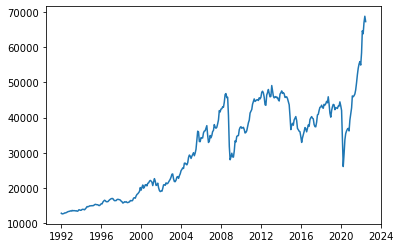

In [10]:
#Create scatterplot
plt.plot(data1["Years"], data1["Sales"])

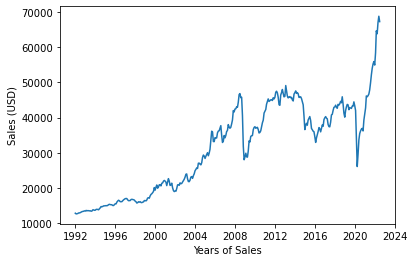

In [11]:
#Add x and y labels
plt.xlabel('Years of Sales')
plt.ylabel('Sales (USD)')
plt.plot(data1["Years"], data1["Sales"])

In [12]:
#Convert x-axis and y axis to NumPy array
x = np.array(data1["Years"], dtype='float64')
y = np.array(data1["Sales"], dtype = 'float64')

[ 4.14124661e-14 -1.74429486e+04]
 
4.141e-14 x - 1.744e+04


Text(0.5, 1.0, 'Effects of Gasoline Prices and COVID-19 on Gasoline Sales')

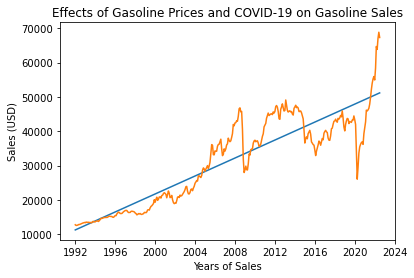

In [14]:
#Get slope and intercept
fit = np.polyfit(x, y, deg=1)
print(fit)
#Create fit function
fit_function = np.poly1d(fit)
print(fit_function)
#Plot linear regression line
plt.plot(data1["Years"], fit_function(x))
#Plot time series data
plt.plot(data1["Years"], data1["Sales"])
plt.xlabel('Years of Sales')
plt.ylabel('Sales (USD)')
plt.title('Effects of Gasoline Prices and COVID-19 on Gasoline Sales')

In [32]:
#Make a prediction based on regression with sklearn using a train-test split
#Read more about the train-test split model: https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
from sklearn.model_selection import train_test_split
#Get independent and dependent variables from dataset
x = data1.iloc[:,0].values
y = data1.iloc[:,1].values
#Reshape 1-D data to 2-D for regression
x = x.reshape(-1,1)
y = y.reshape(-1,1)
#Convert x and y data to numpy arrays
x = np.array(x, dtype='float64')
y = np.array(y, dtype = 'float64')
#Split data into test and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)
#Import linear regression from sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#Fit model onto training data
lr.fit(x_train, y_train)
#Test model
y_pred = lr.predict(x_test)

Text(0, 0.5, 'Sales (USD)')

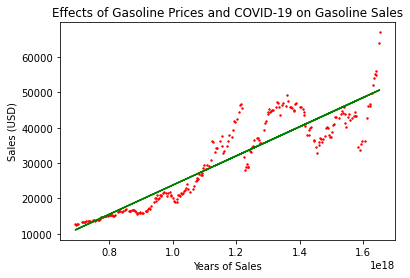

In [33]:
#Plot observations
plt.scatter(x_train, y_train, s = 2, color = 'red')
#Plot regression line
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.title('Effects of Gasoline Prices and COVID-19 on Gasoline Sales')
plt.xlabel('Years of Sales')
plt.ylabel('Sales (USD)')


Text(0, 0.5, 'Sales (USD)')

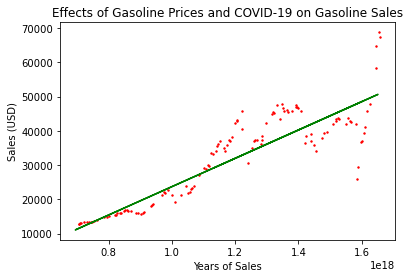

In [34]:
#Plot model training data
plt.scatter(x_test, y_test, s = 2, color = 'red')
#Prediction model
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.title('Effects of Gasoline Prices and COVID-19 on Gasoline Sales')
plt.xlabel('Years of Sales')
plt.ylabel('Sales (USD)')